In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('df_model')

In [3]:
df = df.dropna(subset =['final_years', 'final_make'])
df =df.drop(['make','make_title', 'year', 'years', 'title_lower', 'URL', 'bikeTitle', 'attributes',], axis =1)
df = df[df['final_years'].astype(str).str.isdigit()]
df['odometer'] = df.odometer.str.extract('(^\d*)')
df[["final_years"]] = df[['final_years']].apply(pd.to_numeric)
df['Price']= df['Price'].apply(lambda x: x.replace('$',''))
df['Price']= df['Price'].apply(lambda x: x.replace(',',''))
df[['Price']] = df[['Price']].apply(pd.to_numeric)
df[['odometer']] = df[['odometer']].apply(pd.to_numeric)
df =df.reset_index(drop=True)
df['condition'] = df['condition'].str.replace('excellentcryptocurrency ok', 'excellent')
df['condition'] = df['condition'].str.replace('like newcryptocurrency ok', 'like new')
df['condition'] = df['condition'].str.replace('goodcryptocurrency ok', 'good')
df['condition'] = df['condition'].str.replace('faircryptocurrency ok', 'fair')
df['condition'] = df['condition'].str.replace('newcryptocurrency ok', 'new')
# df = df[df['Price']<50000]
# df=df[df['Price']>600]
# df = df[df['odometer']<100000]
# df = df[df['final_years']>1960]
# df = df[df['final_years']<2022]
# df.drop("VIN", inplace =True, axis =1)
# df =df.reset_index(drop=True)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

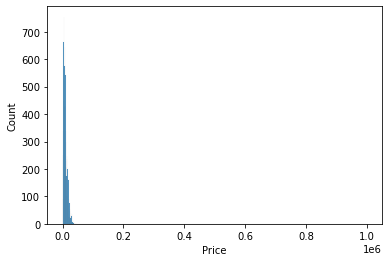

In [5]:
sns.histplot(df['Price'])
plt.ticklabel_format(style='plain', axis='y')

In [6]:
df = df[df['Price']<50000]
df=df[df['Price']>600]
df = df[df['odometer']<100000]
df = df[df['final_years']>1960]
df = df[df['final_years']<2022]
df.drop("VIN", inplace =True, axis =1)
df =df.reset_index(drop=True)

In [7]:
df['final_years'].value_counts()

2021    684
2017    631
2018    614
2019    576
2016    540
       ... 
1963      4
1964      4
1967      1
1962      1
1961      1
Name: final_years, Length: 61, dtype: int64

In [8]:
df

,Price,title,fuel,odometer,paint color,title status,transmission,condition,engine displacement (CC),type,final_make,final_years
0,13995,2002 Harley-Davidson FLSTSI SKU:12858,,12382.0,black,clean,manual,NaN,NaN,NaN,harley-davidson,2002
1,9995,2003 Harley-Davidson FLHTCUI (ANNIVERSARY) SKU...,,36852.0,blue,clean,manual,NaN,NaN,NaN,harley-davidson,2003
2,22995,2019 Harley-Davidson FLHX - Street Glide SKU:1...,,11704.0,custom,clean,manual,NaN,NaN,NaN,harley-davidson,2019
3,3000,2002 Honda VTX 1800 C Custom,gas,69000.0,black,clean,manual,excellent,1800,cafe racer,honda,2002
4,19995,2016 Harley-Davidson FLHX - Street Glide SKU:1...,,9284.0,black,clean,manual,NaN,NaN,NaN,harley-davidson,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
7828,11995,2017 Triumph Daytona 675R 675 R 675-R for $247...,gas,9200.0,NaN,clean,manual,excellent,NaN,sport bike,triumph,2017
7829,11999,2019 Triumph Scrambler 1200 XC Brooklands Gree...,NaN,1340.0,green,clean,manual,NaN,NaN,NaN,triumph,2019
7830,5999,2017 Kawasaki KLR 650 Single-Cylinder 651 cc,NaN,1405.0,grey,clean,manual,NaN,NaN,NaN,kawasaki,2017
7831,8599,2018 Ducati Scrambler Classic Longitudinal Twi...,,0.0,,clean,manual,NaN,NaN,NaN,ducati,2018


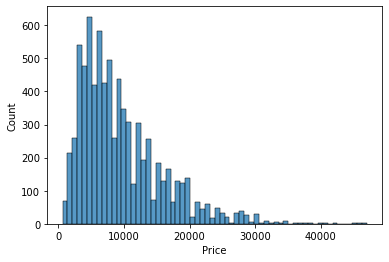

In [9]:
sns.histplot(df['Price'])
plt.ticklabel_format(style='plain', axis='y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     7833 non-null   int64  
 1   title                     7833 non-null   object 
 2   fuel                      7750 non-null   object 
 3   odometer                  7833 non-null   float64
 4   paint color               5740 non-null   object 
 5   title status              7275 non-null   object 
 6   transmission              7780 non-null   object 
 7   condition                 4166 non-null   object 
 8   engine displacement (CC)  3089 non-null   object 
 9   type                      3323 non-null   object 
 10  final_make                7833 non-null   object 
 11  final_years               7833 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 734.5+ KB


In [11]:
df_numbers = df.select_dtypes(exclude=object)

In [12]:
df_numbers

,Price,odometer,final_years
0,13995,12382.0,2002
1,9995,36852.0,2003
2,22995,11704.0,2019
3,3000,69000.0,2002
4,19995,9284.0,2016
...,...,...,...
7828,11995,9200.0,2017
7829,11999,1340.0,2019
7830,5999,1405.0,2017
7831,8599,0.0,2018


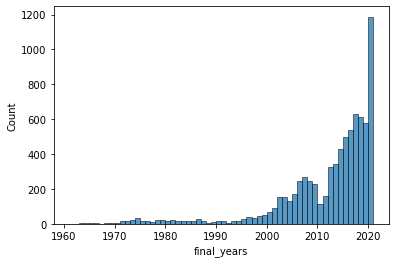

In [13]:
sns.histplot(df_numbers['final_years'])
plt.ticklabel_format(style='plain', axis='y')

## Train-Test Split
To create linear regresion models, we first need to split our data in to training data and testing data.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [15]:
# Use train_test_split to create training data and testing data
X = df_numbers.drop(['Price'], axis=1)
y = df_numbers['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
X_train

,odometer,final_years
3477,798.0,2016
577,2601.0,2020
59,225.0,2020
7348,1069.0,2017
787,27347.0,2011
...,...,...
5226,22049.0,2016
5390,7.0,2020
860,9689.0,2006
7603,2372.0,2018


In [17]:
# X_train = X_train[X_train['odometer']<100000]
# X_train = X_train[X_train['final_years']>1900]
# X_train = X_train[X_train['final_years']<2022]

In [18]:
X

,odometer,final_years
0,12382.0,2002
1,36852.0,2003
2,11704.0,2019
3,69000.0,2002
4,9284.0,2016
...,...,...
7828,9200.0,2017
7829,1340.0,2019
7830,1405.0,2017
7831,0.0,2018



After we split the data and clean some training data, we are going to work with the training data.

Let's first look at which feature is the most correlated with the price.

In [19]:
df.corr()

,Price,odometer,final_years
Price,1.000000,-0.101041,0.382068
odometer,-0.101041,1.000000,-0.352006
final_years,0.382068,-0.352006,1.000000


'final_years' is most correlated with Price as it's one of 2 columns that have integers as the value
We will use this for our baseline model

# Baseline Model

/Users/avijames/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


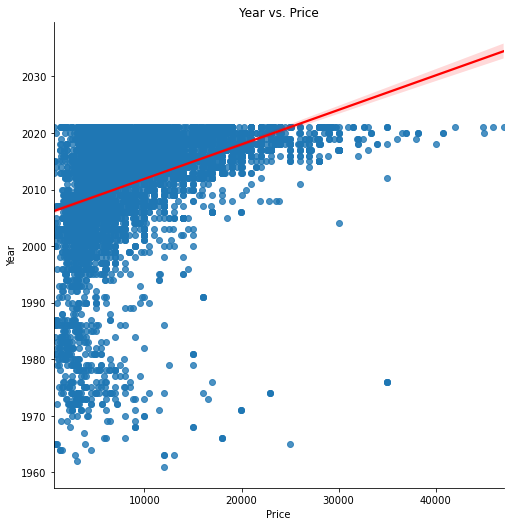

In [20]:
sns.lmplot(data=df_numbers, x='Price', y='final_years', size=7,line_kws={'color':'red'})
plt.xlabel('Price')
plt.ylabel('Year')
plt.title('Year vs. Price');

This graph shows there is a positive correlation between the age and the price (the newer the bike the higher the price)

Now we will get the r-squared values for this model

In [21]:
# We are going to perform 3 separate train-test splits within our X_train and y_train, 
# then we will find both the train and the test scores for each
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['final_years']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.14276921925316813
Validation score: 0.1318934224433317


Our baseline model showed that our r-squared value is 0.13.

# Second Model

Now we are going to try and make our model better by adding in mileage ('odometer) of the bike.

In [22]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean(),'\n')

# Linear Regression (check MAE, MSE, RMSE)
second_model.fit(X_train, y_train)

preds_train = second_model.predict(X_train)
preds_test = second_model.predict(X_test)

print(f'Train MAE: {mean_absolute_error(y_train, preds_train)}')
print('Test MAE:', mean_absolute_error(y_test, preds_test), '\n')

print(f'Train MSE: {mean_squared_error(y_train, preds_train)}')
print('Test MSE:', mean_squared_error(y_test, preds_test),'\n')

print(f'Train RMSE: {mean_squared_error(y_train, preds_train, squared=False)}')
print('Test RMSE:', mean_squared_error(y_test, preds_test, squared=False),'\n')

print(f'Train R-Squared: {r2_score(y_train, preds_train)}')
print(f'Test R-Squared: {r2_score(y_test, preds_test)}\n')

Current Model
Train score:      0.14351502682018602
Validation score: 0.13309730142150078

Baseline Model
Train score:      0.14276921925316813
Validation score: 0.1318934224433317 

Train MAE: 4425.538638198634
Test MAE: 4445.843612118597 

Train MSE: 33079301.475123197
Test MSE: 34376074.85964809 

Train RMSE: 5751.460812273974
Test RMSE: 5863.1113634015255 

Train R-Squared: 0.14109695547807244
Test R-Squared: 0.1635518174021232



By adding in the year and the odometer we were able to improve our model slightly.
Our RMSE is $5,800 which means that our model is approximately \\$5,800 away from the actual price.

# Third Model

We are going to scale and use dummies for all our features so that we can categorical and continuous features on the same scale.

There are a lot of null values so we will replace them with the word 'other' and then drop the 'other'columns

In [23]:
# Use train_test_split to create training data and testing data
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     7833 non-null   int64  
 1   title                     7833 non-null   object 
 2   fuel                      7750 non-null   object 
 3   odometer                  7833 non-null   float64
 4   paint color               5740 non-null   object 
 5   title status              7275 non-null   object 
 6   transmission              7780 non-null   object 
 7   condition                 4166 non-null   object 
 8   engine displacement (CC)  3089 non-null   object 
 9   type                      3323 non-null   object 
 10  final_make                7833 non-null   object 
 11  final_years               7833 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 734.5+ KB


In [25]:
df['fuel'] = df['fuel'].fillna(value='other')
df['paint color'] = df['paint color'].fillna(value='other')
df['title status'] = df['title status'].fillna(value='other')
df['transmission'] = df['transmission'].fillna(value='other')
df['condition'] = df['condition'].fillna(value='other')
df['engine displacement (CC)'] = df['engine displacement (CC)'].fillna(value='other')
df['type'] = df['type'].fillna(value='other')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price                     7833 non-null   int64  
 1   title                     7833 non-null   object 
 2   fuel                      7833 non-null   object 
 3   odometer                  7833 non-null   float64
 4   paint color               7833 non-null   object 
 5   title status              7833 non-null   object 
 6   transmission              7833 non-null   object 
 7   condition                 7833 non-null   object 
 8   engine displacement (CC)  7833 non-null   object 
 9   type                      7833 non-null   object 
 10  final_make                7833 non-null   object 
 11  final_years               7833 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 734.5+ KB


In [27]:
# Paint Color and Brand is Categorical to start
categoricals = ['fuel','paint color','title status', 'transmission', 'condition', 'type', 'final_make']

train_dummies = X_train[categoricals]
test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform the dataset into dummies matrix
enc = ohe.fit(train_dummies)

train_dummies_trans = enc.transform(train_dummies)
test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names)
test_dummies_trans_df = pd.DataFrame(test_data, columns=names)

In [28]:
train_dummies_trans_df

,fuel_,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,fuel_nan,paint color_,paint color_black,paint color_blue,...,final_make_honda,final_make_indian,final_make_kawasaki,final_make_ktm,final_make_norton,final_make_suzuki,final_make_triumph,final_make_vespa,final_make_victory,final_make_yamaha
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
train_dummies_trans_df = train_dummies_trans_df[train_dummies_trans_df.columns.drop(list(train_dummies_trans_df.filter(regex='other')))]
test_dummies_trans_df = test_dummies_trans_df[test_dummies_trans_df.columns.drop(list(test_dummies_trans_df.filter(regex='other')))]

In [30]:
train_dummies_trans_df.reset_index(drop=True, inplace=True)


test_dummies_trans_df.reset_index(drop=True, inplace=True)

X_train =X_train.drop(categoricals, axis=1)
X_test = X_test.drop(categoricals, axis=1)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_train_comb = pd.concat([X_train, train_dummies_trans_df], axis=1)
X_test_comb = pd.concat([X_test, test_dummies_trans_df], axis=1)

In [31]:
X_train_comb = X_train_comb.drop(['title', 'engine displacement (CC)'],axis=1)
X_test_comb = X_test_comb.drop(['title', 'engine displacement (CC)'], axis=1)

In [32]:
X_train_comb

,odometer,final_years,fuel_,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_nan,paint color_,paint color_black,...,final_make_honda,final_make_indian,final_make_kawasaki,final_make_ktm,final_make_norton,final_make_suzuki,final_make_triumph,final_make_vespa,final_make_victory,final_make_yamaha
0,798.0,2016,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2601.0,2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,225.0,2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1069.0,2017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27347.0,2011,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,22049.0,2016,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5870,7.0,2020,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5871,9689.0,2006,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5872,2372.0,2018,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
third_model = LinearRegression()

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_comb,
    y=y_train,
    return_train_score=True,
    cv=splitter
)


print()
print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


Current Model
Train score:      0.48201369143364586
Validation score: 0.476765502757156

Second Model
Train score:      0.14351502682018602
Validation score: 0.13309730142150078

Baseline Model
Train score:      0.14276921925316813
Validation score: 0.1318934224433317


In [34]:
linreg = LinearRegression()
linreg.fit(X_train_comb, y_train)

pred_train = linreg.predict(X_train_comb)
pred_test = linreg.predict(X_test_comb)

print(f'Train R-Squared: {r2_score(y_train, pred_train)}')
print(f'Test R-Squared: {r2_score(y_test, pred_test)}\n')

print(f'Train MAE: {mean_absolute_error(y_train, pred_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, pred_test)}\n')

print(f'Train MSE: {mean_squared_error(y_train, pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, pred_test)}\n')

print(f'Train RMSE: {mean_squared_error(y_train, pred_train, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, pred_test, squared=False)}')

Train R-Squared: 0.48277383692037723
Test R-Squared: 0.4914228321868942

Train MAE: 3215.2266919200465
Test MAE: 3309.8271976603824

Train MSE: 19920153.140050113
Test MSE: 20901338.727704603

Train RMSE: 4463.199876775643
Test RMSE: 4571.798194114062


# Fifth Model to log price

In [63]:
df['Price_log'] = np.log(df['Price'])

In [64]:
df['Price_log'].value_counts()

8.160518     118
8.612503     115
8.411833     111
9.104869     110
8.853523      97
            ... 
8.194229       1
9.463431       1
10.369734      1
7.590852       1
9.822820       1
Name: Price_log, Length: 994, dtype: int64

In [65]:
# Use train_test_split to create training data and testing data
X = df.drop(['Price_log','Price','title', 'fuel', 'title status',
       'transmission', 'condition', 'engine displacement (CC)', 'type'], axis=1)
y = df['Price_log']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [66]:
# Paint Color and Brand is Categorical to start
categoricals = ['paint color', 'final_make']

train_dummies = X_train[categoricals]
test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform the dataset into dummies matrix
enc = ohe.fit(train_dummies)

train_dummies_trans = enc.transform(train_dummies)
test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names)
test_dummies_trans_df = pd.DataFrame(test_data, columns=names)

In [67]:
train_dummies_trans_df.reset_index(drop=True, inplace=True)


test_dummies_trans_df.reset_index(drop=True, inplace=True)

X_train =X_train.drop(categoricals, axis=1)
X_test = X_test.drop(categoricals, axis=1)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

X_train_comb = pd.concat([X_train, train_dummies_trans_df], axis=1)
X_test_comb = pd.concat([X_test, test_dummies_trans_df], axis=1)

In [68]:
y_train.max()

10.735287364761383

In [69]:
X_train_comb

,odometer,final_years,paint color_,paint color_black,paint color_blue,paint color_brown,paint color_custom,paint color_green,paint color_grey,paint color_orange,...,final_make_honda,final_make_indian,final_make_kawasaki,final_make_ktm,final_make_norton,final_make_suzuki,final_make_triumph,final_make_vespa,final_make_victory,final_make_yamaha
0,798.0,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2601.0,2020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,225.0,2020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1069.0,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27347.0,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5869,22049.0,2016,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5870,7.0,2020,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5871,9689.0,2006,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5872,2372.0,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
fifth_model = LinearRegression()

fifth_model_scores = cross_validate(
    estimator=fifth_model,
    X=X_train_comb,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", fifth_model_scores["train_score"].mean())
print("Validation score:", fifth_model_scores["test_score"].mean())
print()
print("Fourth Model")
print("Train score:     ", fourth_model_scores["train_score"].mean())
print("Validation score:", fourth_model_scores["test_score"].mean())
print()
print("Third Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.4863589714785239
Validation score: 0.4693464828170237

Fourth Model
Train score:      0.4862922349868
Validation score: 0.46623025677949537

Third Model
Train score:      0.43126439291839774
Validation score: 0.42359491774668206

Second Model
Train score:      0.143599394070097
Validation score: 0.13309522074647687

Baseline Model
Train score:      0.14264904537712875
Validation score: 0.13246832350419116


In [71]:
linreg = LinearRegression()
linreg.fit(X_train_comb, y_train)

pred_train = linreg.predict(X_train_comb)
pred_test = linreg.predict(X_test_comb)

print(f'Train R-Squared: {r2_score(y_train, pred_train)}')
print(f'Test R-Squared: {r2_score(y_test, pred_test)}\n')

print(f'Train MAE: {mean_absolute_error(y_train, pred_train)}')
print(f'Test MAE: {mean_absolute_error(y_test, pred_test)}\n')

print(f'Train MSE: {mean_squared_error(y_train, pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, pred_test)}\n')

print(f'Train RMSE: {mean_squared_error(y_train, pred_train, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test, pred_test, squared=False)}')

Train R-Squared: 0.4832867947535572
Test R-Squared: 0.4945297006367023

Train MAE: 0.36943177177181263
Test MAE: 0.37246734167520024

Train MSE: 0.2329633070763599
Test MSE: 0.2373670531292343

Train RMSE: 0.48266272600684623
Test RMSE: 0.4872032975352633


In [72]:
df['Price'].value_counts()

3500     118
5500     115
4500     111
8999     110
6999      97
        ... 
44900      1
1885       1
7998       1
3896       1
8188       1
Name: Price, Length: 994, dtype: int64